# K-Means

1. Tabel data

<table border="1" cellpadding="6" cellspacing="0" style="margin: 20, 0, 0, 0;">
  <thead style="background-color: red; color: white;">
    <tr>
      <th rowspan="2">no.</th>
      <th rowspan="2">koordinat x,y</th>
      <th colspan="3">kelompok cluster</th>
    </tr>
    <tr style="background-color: black;">
      <th>K1</th>
      <th>K2</th>
      <th>K3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td align="center">1</td>
      <td align="center">1,1</td>
      <td align="center">True</td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <td align="center">2</td>
      <td align="center">4,1</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">3</td>
      <td align="center">6,1</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">4</td>
      <td align="center">1,2</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">5</td>
      <td align="center">2,3</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">6</td>
      <td align="center">5,3</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">7</td>
      <td align="center">2,5</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
    <tr>
      <td align="center">8</td>
      <td align="center">3,5</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">9</td>
      <td align="center">2,6</td>
      <td></td>
      <td></td>
      <td align="center">True</td>
    </tr>
    <tr>
      <td align="center">10</td>
      <td align="center">3,8</td>
      <td></td>
      <td align="center">True</td>
      <td></td>
    </tr>
  </tbody>
</table>

### hasil :
- data akan dikelompokkan menjadi 3
- iterasi berhenti ketika perpindahan centroid tidak lebih dari 0.1

---

1. fungsi numpy : operasi vektorisasi ( lebih cepat untuk data array)
2. fungsi matplotlib : menampilkan data dalam bentuk diagram

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

menyimpan data dalam bentuk array 2d

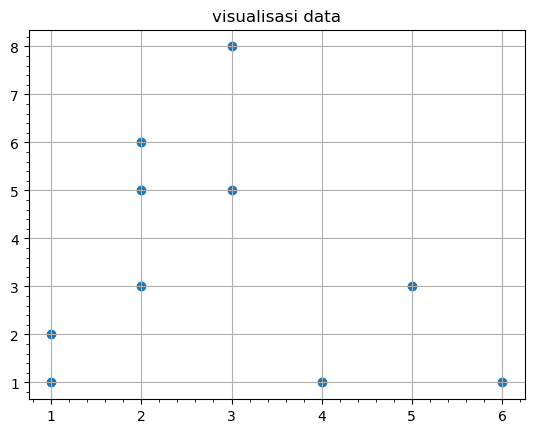

In [3]:
data = np.array([
    [1,1],
    [4,1],
    [6,1],
    [1,2],
    [2,3],
    [5,3],
    [2,5],
    [3,5],
    [2,6],
    [3,8],
])

fig, ax = plt.subplots()

ax.scatter(data[:,0], data[:,1])
ax.minorticks_on()
ax.grid(True)
ax.set_title("visualisasi data")
plt.show()

---

## fungsi randGenKtime 

```py
    centroids = randGenKtime(clusters,dmin,dmax)
```

inisialisasi awal centroid menggunakan nilai random agar performa lebih baik

### Params
- k 
    - jumlah kelompok yang diinginkan
- minval 
    - batas bawah nilai random
- maxval
    - batas atas nilai random

### Return

kumpulan (list) array 2d dengan tipe np.ndarray

In [4]:
def randGenKtime(k,minval,maxval,dim=2) -> list[np.ndarray]:
    if k < 1 or minval is None or maxval is None:
        raise ValueError("k must be greater than or equal to 1" if k < 1 else "minval and maxval can't be None")
    
    if maxval == minval:
        raise ValueError("minval and maxval shouldn't be equal")
    
    minval, maxval = min(maxval,minval), max(maxval,minval)
    dim = max(1,dim)

    lis:list[np.ndarray] = []
    while len(lis) < k:
        tp = np.random.uniform(minval,maxval+1,dim)
        if any(np.array_equal(tp, x) for x in lis):
            continue
        lis.append(tp)
    
    return lis



---

## fungsi kMeans

```py
    final, history = kMeans(data=data,epsilon=epsilon,clusters=clusters)
```

### Penjelasan
- variabel final adalah 2dimensional array, dengan k elemen centroid (pusat cluster)
- history adalah list dari centroid sebelum final (menandakan pergerakan centroid)

### Params
- `data` 
    - 2 dimensional array tipe np.ndarray (data yang akan dikelompokkan)
- `epsilon`
    - batas minimal centroid berpindah, iterasi akan dihentikan apabila centroid tidak lagi berpindah
        - default 1e-6 atau 10 x -6 (0.000001)
- `clusters`
    - banyak kelompok yang diinginkan pada data set
- `maxiter`
    - batas iterasi maksimal, untuk menghentikan loop tak hingga

In [14]:
dmin, dmax = data.min(), data.max()
epsilon = 1e-6
clusters = 3

def kMeans(data: np.ndarray, epsilon:float=0., clusters:int=2, maxiter=300) -> tuple[np.ndarray,list[np.ndarray]]:

    if not isinstance(data,np.ndarray):
        raise ValueError("data has to be ndimensional array type:np.ndarray")

    centroids = randGenKtime(clusters,dmin,dmax,data.ndim)
    count = 0
    history = []

    while True:
        
        list_of_distances = []

        for centroid in centroids:
            list_of_distances.append((data - centroid)**2)

        stacked = np.stack(list_of_distances,axis=1)
        Kcluster = np.array([s.sum(axis=1).argmin() for s in stacked])
        
        deltaD = 0

        history.append(np.array(centroids,copy=True))

        for i in range(clusters):
            member = data[Kcluster == i]

            centroid_candidate = member.mean(axis=0) if len(member) else centroids[i]
            deltaD = max(deltaD, np.sum((centroid_candidate - centroids[i])**2))
            centroids[i] = centroid_candidate

        count += 1

        if deltaD <= epsilon or count >= maxiter:
            break

    return np.array(centroids),history


---

## visualisasi hasil clustering

In [45]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
final, history = kMeans(data=data,epsilon=epsilon,clusters=clusters)
padding = 0.5

history.append(final.copy())

if any([ not isinstance(i,np.ndarray) for i in history]):
    print("bukan elemen ndarray ditemukan")
    

def update(frame):
    ax.clear()

    points = history[frame]
    vor = Voronoi(points.round(decimals=2))
    ax.minorticks_on()


    voronoi_plot_2d(
        vor,
        ax=ax,
        show_vertices=False,
        line_colors='black',
        line_width=1
    )

    ax.scatter(data[:,0], data[:,1], c='red', s=50)
    ax.grid(True)
    ax.set_ylim(dmin - padding,dmax + padding)
    ax.set_xlim(dmin - padding,dmax + padding)
    ax.set_title("K Means")

ani = FuncAnimation(
    fig=fig,
    func=update,
    frames=len(history),
    interval=500
)

animation = ani.to_jshtml()
ani.save("kmeans.gif", writer="pillow", fps=2)
plt.close(fig)
HTML(animation)

# Hasil

<img src="kmeans.gif"/>

---
# ID3 `Iterative Dichotomizer 3`

pandas digunakan untuk I/O data dari sumber lain seperti file csv, teks, JSON, dll

menjadi `dataframe` sebuah dictionary berisi pasangan `key : list[data]`

In [ ]:
import pandas as pd

df = pd.read_csv('./data/Data.csv').astype("string")

## Visualisasi data

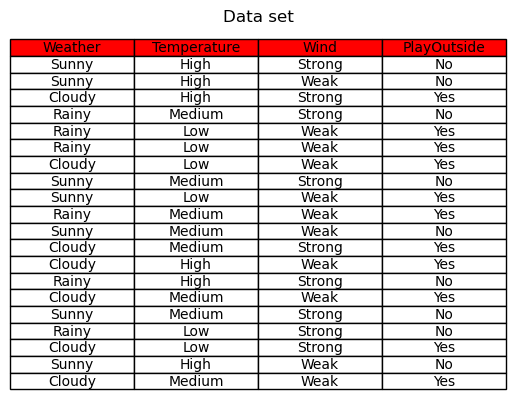

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')
ax.set_title("Data set")


ax.table(cellText=df.values,colColours=['r']*len(df),colLabels=df.columns,loc='center',cellLoc='center')
plt.show()

---

## fungsi filterDF
filter dataframe kolom tertentu dengan value spesifik

In [ ]:
def filterDF(dataset:pd.DataFrame,colname:str,value:str) -> pd.DataFrame:
    if (dataset.empty or colname is None or value is None ):
        raise ValueError(f"dataset, colname, or value can't be empty")
    return dataset[dataset[colname] == value]

--- 

## fungsi entropy

```Python
    split_entropy = entropy(dataset, attr, target)
```

### Params
- dataset : DataFrame
    - dataframe merupakan tipe data pandas. pd.DataFrame
- a : str
    - nama kolom dataframe, yang dipilih sebagai subset untuk dihitung atribut entropynya
- b : str
    - nama kolom dataframe, yang dipilih sebagai classifier

### Return
dict **[** key:`str` , `nd.array` **[** entropy:`float32`, jumlah_data:`float32` **]** **]**

In [ ]:
def entropy(dataset:pd.DataFrame, a:str, b:str ) -> dict[str,np.ndarray]:
    if (dataset.empty or a is None or b is None ):
        raise ValueError(f"dataset, a, or b can't be empty")
    
    unique_a= dataset[a].value_counts()
    unique_b= dataset[b].value_counts()

    sameCol = a == b

    dict_entropy = {}

    for u_a in unique_a.index:

        reduced = filterDF(dataset,a,u_a)
        sum_val = 0

        for u_b in unique_b.index:

            n = len(filterDF(reduced,b,u_b))
            if n == 0 : 
                continue
            
            probability = n/(unique_a[u_a] if not sameCol else unique_a.sum())
            sum_val += probability * np.log2(probability)
            
            if sameCol:
                break

        dict_entropy[u_a] = np.array([-sum_val,unique_a[u_a]]).astype(np.float32)

    if not sameCol:
        return dict_entropy

    vals = np.vstack(list(dict_entropy.values()))
    total = vals.sum(axis=0)

    return {'S': total}

---

## fungsi gainFn

```Python
    gain = gainFn(dataset_entropy, split_entropy)
```

menghitung gain subset dari dataset

### Params
- dataset_entropy: dict
- aSplit_entropy: dict

### Return 
- float


In [ ]:
def gainFn(dataset_entropy:dict, aSplit_entropy:dict ) -> float:
    if len(dataset_entropy) != 1 or len(aSplit_entropy) == 0:
        raise ValueError("dataset_entropy len must equal to 1, asplit_entropy can't be empty")
    
    S , length = list(dataset_entropy.values())[0]
    entropies = np.vstack(list(aSplit_entropy.values()))
    
    total = entropies[:,1].sum()

    gain =  S - np.sum((entropies[:,1]/total)*entropies[:,0])

    return gain

---

## fungsi build_id3

```Python
    tree = build_id3(df,"PlayOutside")
```

### Params
- dataset : DataFrame
    - dataset dari pd.DataFrame
- target : str
    - nama kolom `header` pada dataset, atributnya digunakan untuk classifier

In [ ]:
def build_id3(dataset: pd.DataFrame, target: str):
    if dataset.empty:
        return None

    # jika semua target sama → leaf
    if dataset[target].nunique() == 1:
        return dataset[target].iloc[0]

    # kandidat atribut (selain target)
    attributes = [c for c in dataset.columns if c != target]

    # jika atribut habis → majority vote
    if len(attributes) == 0:
        return dataset[target].value_counts().idxmax()

    # entropy dataset
    dataset_entropy = entropy(dataset, target, target)

    # cari atribut terbaik
    best_attr = None
    best_gain = -np.inf

    for attr in attributes:
        split_entropy = entropy(dataset, attr, target)
        gain = gainFn(dataset_entropy, split_entropy)

        if gain > best_gain:
            best_gain = gain
            best_attr = attr

    tree = {best_attr: {}}

    # split dan rekursi
    for val in dataset[best_attr].unique():
        subset = filterDF(dataset, best_attr, val)

        # drop atribut yang sudah dipakai
        subtree_dataset = subset.drop(columns=[best_attr])

        subtree = build_id3(subtree_dataset, target)
        tree[best_attr][val] = subtree

    return tree


tree = build_id3(df,"PlayOutside")

---
# Test
|key|value|
|---|-----|
|Weather|Cloudy|
|Temperature|Medium|
|Wind|Weak|

In [ ]:
query = {
    "Weather": "Cloudy",
    "Temperature": "Medium",
    "Wind":"Weak",
}


copy = tree
i = 0
while isinstance(copy,dict):
    keyname = list(copy.keys())[0]
    if keyname is not None:
        val = query.get(keyname)
        copy = copy[keyname].get(val)
        print('\t'*i + f'{keyname}: {val} {f': {copy}' if not isinstance(copy,dict)else ''}')
        i += 1
        continue
    copy = None

Weather: Cloudy : Yes
